# Content Based Movie Rcommendation System

Content-based filtering, also known as cognitive filtering, is a method of recommending items to users based on their past behavior and preferences.This system in regards to movies suggest series of movies based on information of the past views or searches provided by the user. hence, it specifically tailored to the individual user's interests, rather than making recommendations based on the interests of a general population. 

Lets start by importing neccessary libraries and reading our dataset

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max.columns', None)

In [2]:
#Loading the Dataset
netflix_dataset = pd.read_csv(r'C:\Users\Master Ridwan\Desktop\my data\net_titles.csv')

In [3]:
#viewing your data
netflix_dataset.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [4]:
#making a copy of the dataset
netflix = netflix_dataset.copy()

Data Assessment

In [5]:
#checking the size of the datasets
netflix.size

87090

In [6]:
#checking the number of columns and rows we have in this dataset
netflix.shape

(5806, 15)

In [7]:
#check for more information about each column of the dataset (Non-Null Count, Dtype)
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [8]:
netflix.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

Data Preprocessing

Lets clean the dataset by removing irrelivant character in some columns(genres and production_countries)

In [9]:
#replacing the nullvalue with unknown
netflix.title.fillna('Unknown', inplace=True)
netflix.description.fillna('Unknown', inplace=True)
netflix.age_certification.fillna('Unknown', inplace=True)
netflix.imdb_id.fillna('Unknown', inplace=True)
netflix.seasons.fillna(0,inplace=True)
netflix.imdb_score.fillna(0,inplace=True)
netflix.imdb_votes.fillna(0,inplace=True)
netflix.tmdb_popularity.fillna(0,inplace=True)
netflix.tmdb_score.fillna(0,inplace=True)

In [10]:
netflix.isnull().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [11]:
#removing the characters in the columns 
netflix['genres'] = netflix.genres.str.replace("'", '').str.strip('[]')
netflix['production_countries'] = netflix.production_countries.str.replace("'", '').str.strip('[]')
netflix.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,documentation,US,1.0,Unknown,0.0,0.0,0.600,0.0
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"crime, drama",US,0.0,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"comedy, fantasy",GB,0.0,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,comedy,GB,0.0,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,horror,US,0.0,tt0070047,8.1,391942.0,95.337,7.7


### Exploratory Data Analysis

#### Univariant Analysis

In [12]:
#seleting the important columns needed for analysis
cols =['title', 'type', 'release_year', 'age_certification', 'runtime', 'imdb_score']
netflix_col = netflix[cols]
netflix_col.head()

,title,type,release_year,age_certification,runtime,imdb_score
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,0.0
1,Taxi Driver,MOVIE,1976,R,113,8.3
2,Monty Python and the Holy Grail,MOVIE,1975,PG,91,8.2
3,Life of Brian,MOVIE,1979,R,94,8.0
4,The Exorcist,MOVIE,1973,R,133,8.1


Text(0.5, 1.0, 'The Different Type of Views in Netflix')

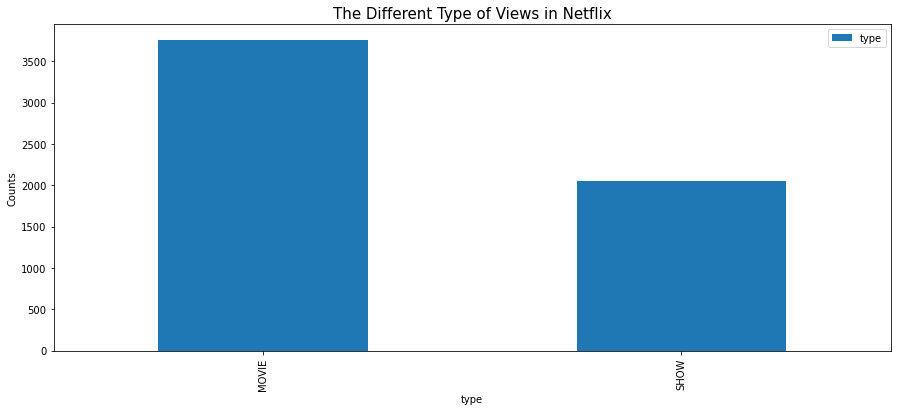

In [13]:
#Plotting the distribution of the movies and shows
plt.figure(figsize = (15,6))
netflix_col['type'].value_counts().plot.bar()
plt.legend()
plt.xlabel('type')
plt.ylabel('Counts')
plt.title('The Different Type of Views in Netflix', size = 15)

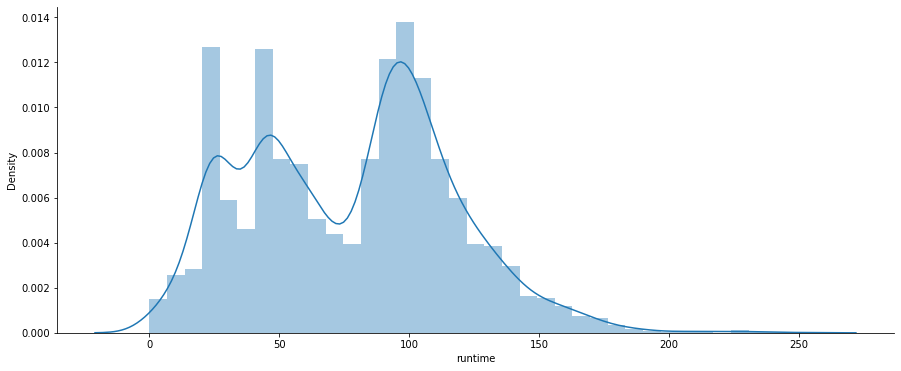

In [14]:
#plottng a distribution plot of the runtime
plt.figure(figsize = (15,6))
sns.distplot(netflix_col['runtime'])
sns.despine()

Observations:
- There are more 'Movies' than 'Show' in the dataset
- The runtime do not follow normal distribution
- There are more runtime of around 100 from the distribution 


#### Bivariant Analysis

In [15]:
netflix_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              5806 non-null   object 
 1   type               5806 non-null   object 
 2   release_year       5806 non-null   int64  
 3   age_certification  5806 non-null   object 
 4   runtime            5806 non-null   int64  
 5   imdb_score         5806 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 272.3+ KB


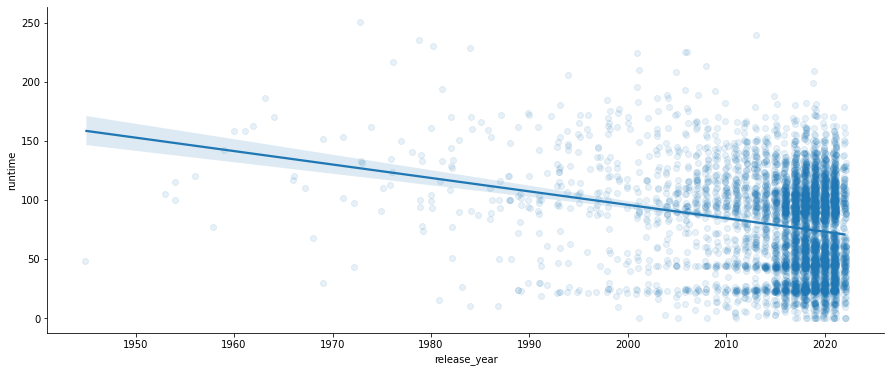

In [16]:
#plotting a regplot showing the relationship between the release_year and the runtime 
plt.figure(figsize = (15,6))
sns.regplot(x = 'release_year', y = "runtime", data =netflix_col, x_jitter = 0.2, scatter_kws = {'alpha':0.1})
sns.despine()

Text(0.5, 1.0, 'The Yearly Distribution of The Imdb_score')

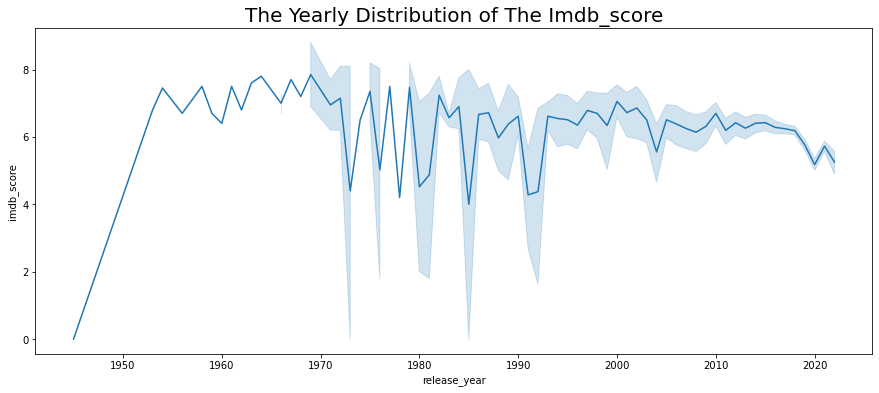

In [17]:
#Showing a lineplot of the relationship between release_year and imdb_score
plt.figure(figsize = [15, 6])
color_pal = sns.color_palette()[0]
sns.lineplot(data= netflix_col, x= 'release_year', y = 'imdb_score' , color = color_pal)
plt.xlabel("release_year")
plt.ylabel("imdb_score")
plt.title("The Yearly Distribution of The Imdb_score", size =20)

Observation:
- There is a decreasing trend of the runtime and the imdb_score over the year
-viewers view more of movies and shows with lesser runtime over the year
-More runtime data are recorded in 2020


Multivariate Exploration

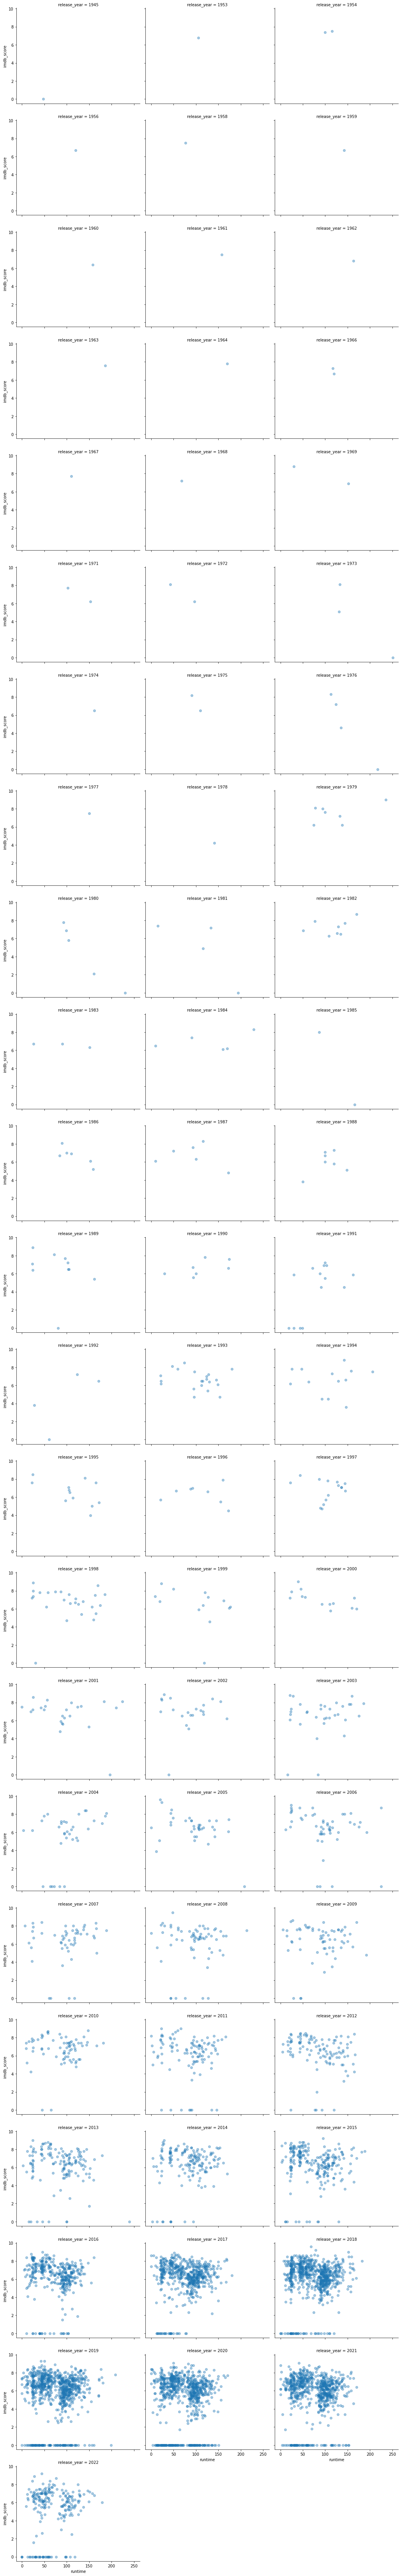

In [18]:
# Checking the relationship between runtime and imdb_score in each recorded year
group=sns.FacetGrid(data=netflix_col, aspect=1.2, height=4, col='release_year', col_wrap=3)
group.map(plt.scatter, 'runtime', 'imdb_score', alpha=0.4);


Observation:
- There is surge in the count of imdb_score over the years

### RECOMMENDATION SYSTEM

In [19]:
netflix.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,documentation,US,1.0,Unknown,0.0,0.0,0.600,0.0
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"crime, drama",US,0.0,tt0075314,8.3,795222.0,27.612,8.2


In [20]:
#making a copy of the dataset
netflix_genres = netflix.copy()

lets create a column per unique genre and assign 1 if the genre is present and 0 if not

In [21]:
#Iterate through the dataset to create a column for unique genre
x = []
for i, row in netflix.iterrows():
    x.append(i)
    for genre in row['genres'].split(','):
        netflix_genres.at[i, genre] =1
netflix_genres.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,documentation,crime,drama,comedy,fantasy,horror,european,thriller,crime,action,drama,music,romance,family,romance,western,war,animation,documentation,comedy,history,war,thriller,fantasy,scifi,action,scifi,family,animation,reality,sport,horror,western,,reality,music,history,sport
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,documentation,US,1.0,Unknown,0.0,0.0,0.600,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"crime, drama",US,0.0,tt0075314,8.3,795222.0,27.612,8.2,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"comedy, fantasy",GB,0.0,tt0071853,8.2,530877.0,18.216,7.8,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,comedy,GB,0.0,tt0079470,8.0,392419.0,17.505,7.8,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,horror,US,0.0,tt0070047,8.1,391942.0,95.337,7.7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#replace the genre with nan value to zero
netflix_genres = netflix_genres.fillna(0)
netflix_genres.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,documentation,crime,drama,comedy,fantasy,horror,european,thriller,crime,action,drama,music,romance,family,romance,western,war,animation,documentation,comedy,history,war,thriller,fantasy,scifi,action,scifi,family,animation,reality,sport,horror,western,,reality,music,history,sport
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,documentation,US,1.0,Unknown,0.0,0.0,0.600,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"crime, drama",US,0.0,tt0075314,8.3,795222.0,27.612,8.2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"comedy, fantasy",GB,0.0,tt0071853,8.2,530877.0,18.216,7.8,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Next,Lets create a dataframe containing information of the favorite movies search and their score for a specific user name ajibs which we will later feed into the system to generate likely result

In [23]:
#collating ajibs's favorite movies search and their score
ajibs = [
    {'title':'My Fair Lady' , 'tmdb_scores':8.9},
    {'title':'Dirty Harry', 'tmdb_scores':5},
    {'title':'Taxi Driver', 'tmdb_scores':6.4},
    {'title':'The Professionals', 'tmdb_scores':4.7},
    {'title':'The Long Riders', 'tmdb_scores':8.7},
    {'title':'The Blazing Sun', 'tmdb_scores':6.9},
    {'title':'Professor', 'tmdb_scores':8.6},
    {'title':'Saved by the Bell', 'tmdb_scores':8.9},
   {'title':'Disco Dancer', 'tmdb_scores':9},
    {'title':'Jaal', 'tmdb_scores':9.6},
    {'title':'The Challenge', 'tmdb_scores':3.2}
]

In [24]:
#create a dataframe with the ajibs movies title and their corresponding tmdb_score
ajibs_movies_scores = pd.DataFrame(ajibs)
ajibs_movies_scores

,title,tmdb_scores
0,My Fair Lady,8.9
1,Dirty Harry,5.0
2,Taxi Driver,6.4
3,The Professionals,4.7
4,The Long Riders,8.7
5,The Blazing Sun,6.9
6,Professor,8.6
7,Saved by the Bell,8.9
8,Disco Dancer,9.0
9,Jaal,9.6


Here, we will generate movie id from the original dataset(netflix) and merge it with the above created user's dataframe (ajibs_movies_scores)

In [25]:
#extract the corresponding movies id from the nexflix dataset and update it to the ajibs_movies_scores
ajibs_id = netflix[netflix['title'].isin(ajibs_movies_scores['title'])]
ajibs_id

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"crime, drama",US,0.0,tt0075314,8.3,795222.0,27.612,8.2
6,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"thriller, crime, action",US,0.0,tt0066999,7.7,153463.0,14.745,7.5
7,tm185072,My Fair Lady,MOVIE,A snobbish phonetics professor agrees to a wag...,1964,G,170,"drama, music, romance, family",US,0.0,tt0058385,7.8,94121.0,15.949,7.6
10,tm67378,The Professionals,MOVIE,An arrogant Texas millionaire hires four adven...,1966,PG-13,117,"western, action, european",US,0.0,tt0060862,7.3,16168.0,12.155,7.1
14,tm96649,The Long Riders,MOVIE,"The origins, exploits and the ultimate fate of...",1980,R,99,"western, crime",US,0.0,tt0081071,6.9,11329.0,8.808,6.6
28,tm19608,The Blazing Sun,MOVIE,A rich landlord floods and destroys a village ...,1954,Unknown,100,"romance, crime, drama",EG,0.0,tt0044429,7.4,1219.0,1.866,7.0
42,tm10204,Professor,MOVIE,Sita devi is a very strict aunt for a number o...,1962,Unknown,163,"romance, comedy, drama",IN,0.0,tt0056379,6.8,285.0,1.900,5.8
60,ts20678,Saved by the Bell,SHOW,Lovable schemer Zack Morris leads his pals on ...,1989,TV-G,23,"comedy, romance, family",US,5.0,tt0096694,7.1,34854.0,16.945,8.0
81,tm52815,Disco Dancer,MOVIE,"Anil, a street singer, is humiliated and drive...",1982,Unknown,134,"drama, romance",IN,0.0,tt0208903,6.5,1449.0,3.042,5.3
100,tm371359,Jaal,MOVIE,Shankar's father leaves the family for Meenaba...,1986,Unknown,159,"drama, thriller, action",IN,0.0,tt0239495,5.2,122.0,3.243,5.0


In [26]:
#merge the ajibs_id with the ajibs_movies_scores
ajibs_movies_scores= pd.merge(ajibs_id,ajibs_movies_scores)
ajibs_movies_scores.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,tmdb_scores
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"crime, drama",US,0.0,tt0075314,8.3,795222.0,27.612,8.2,6.4
1,tm248010,Taxi Driver,MOVIE,A small-town mechanic turned chauffeur for the...,2015,Unknown,100,"crime, drama, comedy",NG,0.0,tt5112438,6.0,68.0,1.244,5.4,6.4
2,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"thriller, crime, action",US,0.0,tt0066999,7.7,153463.0,14.745,7.5,5.0
3,tm185072,My Fair Lady,MOVIE,A snobbish phonetics professor agrees to a wag...,1964,G,170,"drama, music, romance, family",US,0.0,tt0058385,7.8,94121.0,15.949,7.6,8.9
4,tm67378,The Professionals,MOVIE,An arrogant Texas millionaire hires four adven...,1966,PG-13,117,"western, action, european",US,0.0,tt0060862,7.3,16168.0,12.155,7.1,4.7


lets drop some columns that isnt neccessary in the user's information dataframe

In [28]:
#drop some columns 
ajibs_movies_scores=ajibs_movies_scores.drop(['type','description','release_year','age_certification','runtime','genres','production_countries','seasons','imdb_id','imdb_score','imdb_votes','tmdb_popularity','tmdb_score'], 1)
ajibs_movies_scores

,id,title,tmdb_scores
0,tm84618,Taxi Driver,6.4
1,tm248010,Taxi Driver,6.4
2,tm14873,Dirty Harry,5.0
3,tm185072,My Fair Lady,8.9
4,tm67378,The Professionals,4.7
5,tm96649,The Long Riders,8.7
6,tm19608,The Blazing Sun,6.9
7,tm10204,Professor,8.6
8,ts20678,Saved by the Bell,8.9
9,tm52815,Disco Dancer,9.0


Here, we will generate only the movies in the user's dataframe from the netflix's genre which are now in binary forms, reset the index

In [29]:
#print only the movies with ajibs_movies_scores that are present in the netflix_genre
ajibs_genre = netflix_genres[netflix_genres.id.isin(ajibs_movies_scores.id)]
# resetting the index to default
ajibs_genre.reset_index(drop=True, inplace=True)


In [30]:
#dropping some columns
ajibs_genre.drop(['id','title','type','description','release_year','age_certification','runtime','genres','production_countries','seasons','imdb_id','imdb_score','imdb_votes','tmdb_popularity','tmdb_score'], axis=1, inplace=True)

ajibs_genre

,documentation,crime,drama,comedy,fantasy,horror,european,thriller,crime,action,drama,music,romance,family,romance,western,war,animation,documentation,comedy,history,war,thriller,fantasy,scifi,action,scifi,family,animation,reality,sport,horror,western,,reality,music,history,sport
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
#check the shape of the ajibs_genre and ajibs_movies_scores for next matrix matripulation compatibilty
print(ajibs_genre.shape)
print(ajibs_movies_scores.shape)

(12, 38)
(12, 3)


In [32]:
#finding the dot product of transpose of ajibs_genres with ajibs_movies_scores column
ajibs_info = ajibs_genre.T.dot(ajibs_movies_scores.tmdb_scores)
ajibs_info

documentation      0.0
crime              9.6
 drama            34.8
comedy             8.6
 fantasy           0.0
horror             0.0
 european          8.9
thriller           6.4
 crime            19.8
 action           24.3
drama             22.9
 music             5.0
 romance          22.5
 family           13.6
romance           15.6
western           13.6
war                0.0
 animation         0.0
 documentation     0.0
 comedy           19.7
 history           0.0
 war               0.0
 thriller          9.0
fantasy            0.0
scifi              0.0
action             0.0
 scifi             9.6
family             0.0
animation          0.0
reality            9.6
 sport             0.0
 horror            0.0
 western           0.0
                   0.0
 reality           0.0
music              0.0
history            0.0
sport              0.0
dtype: float64

- From this view, we can see that this user have more interest in drama.

### Deploying The System

In [33]:
netflix_genres.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,documentation,crime,drama,comedy,fantasy,horror,european,thriller,crime,action,drama,music,romance,family,romance,western,war,animation,documentation,comedy,history,war,thriller,fantasy,scifi,action,scifi,family,animation,reality,sport,horror,western,,reality,music,history,sport
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,documentation,US,1.0,Unknown,0.0,0.0,0.600,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"crime, drama",US,0.0,tt0075314,8.3,795222.0,27.612,8.2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"comedy, fantasy",GB,0.0,tt0071853,8.2,530877.0,18.216,7.8,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Next, Lets make remove default indexing to make only the id as the dataset primary index.

In [34]:
#resetting the netflix_genres id
netflix_genres = netflix_genres.set_index(netflix_genres.id)
netflix_genres.head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,documentation,crime,drama,comedy,fantasy,horror,european,thriller,crime,action,drama,music,romance,family,romance,western,war,animation,documentation,comedy,history,war,thriller,fantasy,scifi,action,scifi,family,animation,reality,sport,horror,western,,reality,music,history,sport
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ts300399,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,documentation,US,1.0,Unknown,0.0,0.0,0.600,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tm84618,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"crime, drama",US,0.0,tt0075314,8.3,795222.0,27.612,8.2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tm127384,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"comedy, fantasy",GB,0.0,tt0071853,8.2,530877.0,18.216,7.8,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
#dropping some columns from the netflix_genres
netflix_genres =netflix_genres.drop(['id','title','type','description','release_year','age_certification','runtime','genres','production_countries','seasons','imdb_id','imdb_score','imdb_votes','tmdb_popularity','tmdb_score'], 1)
netflix_genres

,documentation,crime,drama,comedy,fantasy,horror,european,thriller,crime,action,drama,music,romance,family,romance,western,war,animation,documentation,comedy,history,war,thriller,fantasy,scifi,action,scifi,family,animation,reality,sport,horror,western,,reality,music,history,sport
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ts300399,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tm84618,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tm127384,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tm70993,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tm190788,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tm1014599,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tm1108171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
tm1045018,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Next, lets take weighted average of every movie based on the user's profile and recommend the top ten movies that match his preference.

In [36]:
# Multipling the genres by the weights and then take the weighted average.
movie_recommendation = (netflix_genres.dot(ajibs_info)) / ajibs_info.sum()
movie_recommendation.head()
     

id
ts300399    0.000000
tm84618     0.175148
tm127384    0.033925
tm70993     0.033925
tm190788    0.000000
dtype: float64

In [37]:
# sorting the values from great to small
movie_recommendation.sort_values(ascending=False, inplace=True)
movie_recommendation.head(20)

id
ts312071    0.477712
tm164557    0.466272
ts22286     0.453254
ts20014     0.453254
ts34066     0.453254
tm852172    0.447337
tm413169    0.442604
ts34435     0.437870
ts75620     0.435503
ts20429     0.435108
tm94651     0.430769
tm408781    0.430769
ts80519     0.430769
tm152724    0.425247
tm96168     0.425247
tm319139    0.425247
ts21740     0.424458
ts20336     0.423669
tm33981     0.422091
tm319224    0.419724
dtype: float64

In [38]:

# copying of the original netflix
netflix_df = netflix.copy(deep=True)

# setting its index to id
netflix_df = netflix_df.set_index('id', drop=True)

# listing the top 10 recommended ids we defined above
top_10_id = movie_recommendation.index[:10].tolist()


In [39]:

#slicing these indices from the copied movies df and save in a variable
recommended_movies = netflix_df.loc[top_10_id, :]

#displaying the top 20 movies in descending order of preference
recommended_movies

,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
id,,,,,,,,,,,,,,
ts312071,The Way of the Househusband,SHOW,"Tatsu, a notorious and feared yakuza leader ni...",2021,TV-MA,17,"animation, action, comedy, crime, drama, romance",JP,1.0,tt13357124,7.3,3724.0,24.343,8.7
tm164557,Initial D,MOVIE,"After winning his first competition, Takumi fo...",2005,Unknown,107,"drama, action, crime, thriller, animation, com...","HK, JP",0.0,tt0439630,6.3,8536.0,15.248,6.7
ts22286,Cardcaptor Sakura,SHOW,"Sakura Kinomoto, an elementary school student ...",1998,TV-Y7,25,"scifi, comedy, drama, family, fantasy, romance...",JP,4.0,tt0221735,8.0,4936.0,53.714,8.7
ts20014,Sailor Moon Crystal,SHOW,Usagi Tsukino is chosen to be a guardian of ju...,2014,TV-14,24,"scifi, animation, action, comedy, drama, fanta...",JP,4.0,tt3124992,7.8,2115.0,59.673,8.2
ts34066,Mako Mermaids: An H2O Adventure,SHOW,"Real-life mermaids, Sirena, Nixie and Lyla are...",2013,TV-G,25,"scifi, action, comedy, drama, family, fantasy,...",AU,4.0,tt2548214,6.7,3924.0,54.741,7.6
tm852172,Apollo 10½: A Space Age Childhood,MOVIE,A man narrates stories of his life as a 10-yea...,2022,PG-13,98,"comedy, action, animation, romance, family, ho...","NL, US",0.0,tt7978758,7.3,4932.0,12.340,7.1
tm413169,Peter Rabbit 2: The Runaway,MOVIE,"Bea, Thomas, and the rabbits have created a ma...",2021,PG,93,"fantasy, family, comedy, action, animation, cr...","US, AU",0.0,tt8376234,6.2,10714.0,120.527,7.3
ts34435,Cowboy Bebop,SHOW,"In 2071, roughly fifty years after an accident...",1998,TV-14,25,"western, action, scifi, thriller, animation, c...",JP,1.0,tt0213338,8.9,112887.0,34.769,8.5
ts75620,Black,SHOW,"A Grim Reaper, a detective and a woman who for...",2017,TV-MA,78,"scifi, drama, action, thriller, horror, romanc...",KR,2.0,tt6380900,8.0,3665.0,18.754,8.0


by feeding the system with ajibs profile information, the recommendation system where able to suggest ten difference movies based of the user preference. Bravo!